# Linear regression

In this session you will :
* practice more on numpy arrays
* implement linear regression to fit experimental data that follows an affine law
* implement linear regression to fit experimental data that follows a more complex law
* do high-dimensional classification with regularized linear regression and cross-validate the regularization strength.

We need the usual libraries to handle arrays and to plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1 – Warm-up : a few more computations with arrays

Compute $\sum_{n=1}^N\frac{(-1)^{n+1}}{n}$ for $N=1000$ (without a `for` loop).

In [2]:
### to be completed

### solution
ns = np.arange(0,1000)+1
np.sum(-(-1)**ns/ns)

0.6926474305598204

Plot the function $x\rightarrow\log(1+\cos(\pi x))$.

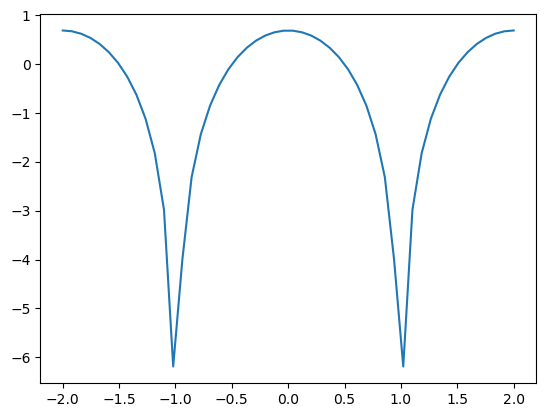

In [3]:
### to be completed

### solution
xs = np.linspace(-2,2,50)
plt.plot(xs, np.log(1+np.cos(np.pi*xs)))

### 2 – Simple regression to fit an affine law

We are given data from an experiment. We want to analyse it, i.e. to propose a simple relation bewteen the quantities we measure. We consider an experiment done during a TP. It consists in studying the efficiency and the characteristic curve of a fuel cell. A fuel cell generates electricity from a chemical reaction, and we measure a stationary current $I$ at voltage $U$. We focus on the law between $U$ and $I$.

Measurements were made by students, whom we thank for sharing their results. They varied the current $I$ and measured the tension $U$. The values are stored in the file DataH9.csv. This is a common format for saving experimental results. There is one line per sample and the measured values of each sample are separated by a comma. In the following cell we open the file and print its content.

In [4]:
with open("DataH9.csv", 'rt') as f:
    data = f.read()
    
print(data)

Current [A],Voltage [V]
0.017,0.873
0.021,0.867
0.028,0.857
0.041,0.843
0.079,0.815
0.088,0.812
0.099,0.808
0.112,0.802
0.129,0.795
0.152,0.786
0.186,0.774
0.241,0.758
0.342,0.731
0.592,0.675
0.606,0.675
0.75,0.636
1.066,0.573
1.364,0.514
2.212,0.343
2.317,0.308
2.503,0.256
2.562,0.236



Convert the file DataH9.csv to a numpy array. Use the function `np.loadtxt` with the optional arguments `delimiter=","` and `skiprows=1` (to skip the first line). Print its dimensions ; how many samples do we have ?

In [5]:
### to be completed

### solution
data = np.loadtxt("DataH9.csv", delimiter=',', skiprows=1)
print(data.shape)

(22, 2)


From the numpy array extract the column corresponding to $U$ and the column corresponding to $I$.

In [6]:
### to be completed
#U =
#I =

### solution
U = data[:,1]
I = data[:,0]

Before doing regression we check that an affine fit is relevant. Plot the characteristic curve $U$ vs $I$. Since we want separated dots to see the different measurements we use the function `plt.scatter`, and not `plt.plot`, that draws continuous lines. Add labels to the axes (these are the same functions for `scatter` and `plot`).

Text(0, 0.5, 'U')

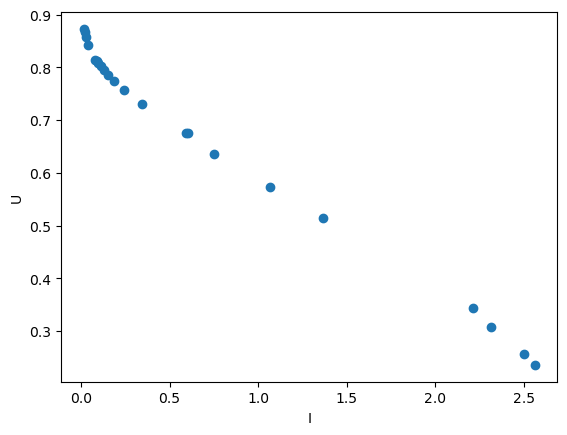

In [7]:
### to be completed

### solution
plt.scatter(I, U)
plt.xlabel("I")
plt.ylabel("U")

We want to model the relationship between $U$ and $I$ by the equation $U=aI+b$, where $a$ and $b$ are real numbers to be determined. In the course you saw that the least square formula prescribes $a=\frac{\bar{UI}-\bar{U}\bar{I}}{\bar{I^2}-\bar{I}^2}$ and $b=\bar{U}-a\bar{I}$, where $\bar{x}$ is the mean of the array $x$ across the samples.

Compute the fit given by the least squares, i.e. compute a and b. You can use the function `np.mean`. Print the computed coefficients $a$ and $b$.

In [8]:
### to be completed
#a = 
#b =
#print()

### solution
a = (np.mean(U*I)-np.mean(U)*np.mean(I))/(np.mean(I**2)-np.mean(I)**2)
b = np.mean(U)-a*np.mean(I)
print("a={:.2}, b={:.2}".format(a, b))

a=-0.23, b=0.83


We want to see how good the fit is. Plot the line $U=aI+b$ on top of the experimental datapoints. You can create a new array of $I$ with the function `np.linspace` and compute the corresponding $U$. Use both functions `plt.plot` and `plt.scatter`, add labels to the axes and to the curves. To label the curves use the optional argument `label=` in the two functions and call the function `plt.legend` at the end to print the legend.

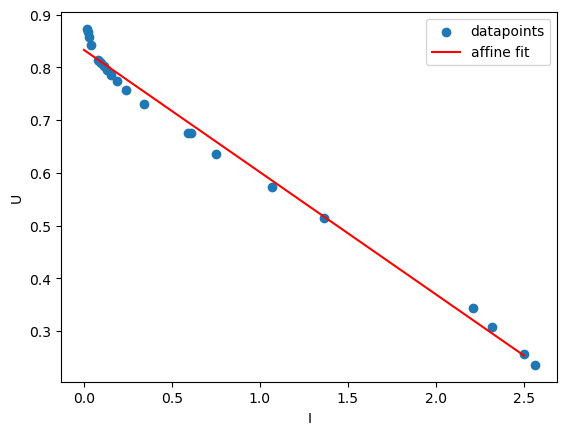

In [9]:
### to be completed

### solution
plt.scatter(I, U, label="datapoints")
Ireg = np.linspace(0, 2.5, 20)
plt.plot(Ireg, a*Ireg+b, label="affine fit", color='r')
plt.xlabel("I")
plt.ylabel("U")
plt.legend()

To save the figure, you can use `plt.savefig`.

Optionally, you can redo the regression excluding the datapoints that are too close from $I=0$ or $I=2.5$, where $U$ does not have a linear behaviour.

### 3 – Regression to fit a polynomial

In the experiment of the fuel cell we are interested in the power delivered by the cell. Approximately, the power is $P=U\times I$. Since we have a linear fit between $U$ and $I$ we guess there is a quadratic fit between $P$ and $I$. Plot the experimental curve $P$ vs $I$ to visually check this.

Text(0, 0.5, 'P')

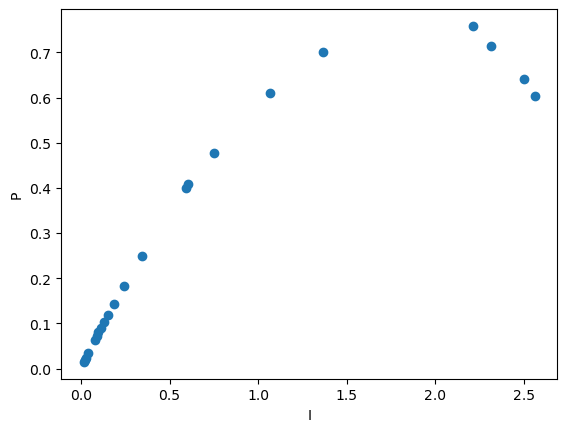

In [10]:
### to be completed

### solution
plt.scatter(I, I*U)
plt.xlabel("I")
plt.ylabel("P")

As seen in the course, although we are doing linear regression, we can fit functions more complex than linear functions. In our case we want a quadratic fit $P=aI^2+bI+c$.

Considering a sample labelled $\mu$ among the $N$ samples, we want a fit $y_\mu=X_\mu^Tw$ where $y_\mu$ is the predicted value, $X_\mu=(1, x_\mu, x_\mu^2, \ldots, x_\mu^p)$ are all the measured quantities on which $y_\mu$ may depend, and $w=(w_1, \ldots, w_p)$ are the parameters to learn. This is still a linear regression in the sense that $y_\mu$ depends linearly on $w$. In our case, $y_\mu=P_\mu$, $X_\mu=(1, I_\mu, I_\mu^2)$ and $w=(c, b, a)$.

We stack the samples $\mu$ into a vector $Y=(y_1, \ldots, y_N)^T$ and a matrix $X=(X_1,\ldots,X_N)^T\in\mathbb R^{N\times p}$. The problem then is in the form $Y=Xw$. In the course you saw that the least square formula gives $w=(X^TX)^{-1}X^Ty$.

The first step is to build $y$ and $X$. You can use the function `np.stack` to stack vectors to form a matrix. Check that the resulting matrix has the right dimensions.

In [11]:
### to be completed
#y =
#X =
#print()

### solution
y = U*I
X = np.stack([0*I+1, I, I**2]).T
print(X.shape)

(22, 3)


Compute $w$ given by the formula above. To invert the matrix you can use a function from the module `np.linalg`. Print the computed coefficients $a$, $b$ and $c$.

In [12]:
### to be completed
#w =
#print()

### solution
w = np.linalg.inv(X.T@X)@(X.T@y)
print("a={:.2}, b={:.2}, c={:.2}".format(w[2], w[1], w[0]))

a=-0.22, b=0.82, c=-0.00063


We want to see how good the fit is. Plot the curve $P=aI^2+bI+c$ on top of the experimental datapoints. You can create an array of $I_n$ with the function `np.linspace` ; you need then to construct a new $X_n$ and compute the predicted $y_n=X_nw$.

Use both functions `plt.plot` and `plt.scatter`, add labels to the axes and to the curves.

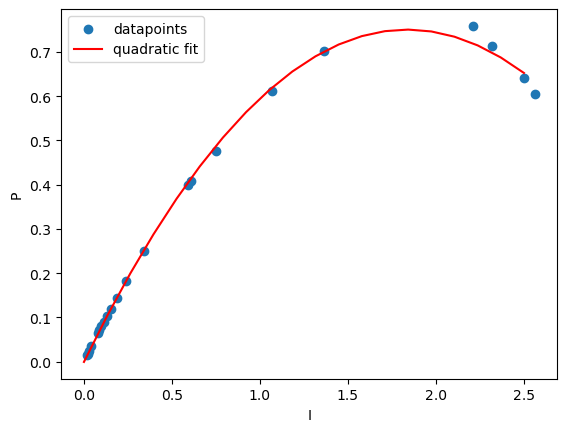

In [13]:
plt.scatter(I, U*I, label="datapoints")

Ireg = np.linspace(0, 2.5, 20)
Xreg = np.stack([0*Ireg+1, Ireg, Ireg**2]).T
yReg = Xreg@w
plt.plot(Ireg, yReg, label="quadratic fit", color='r')

plt.xlabel("I")
plt.ylabel("P")
plt.legend()

As an optional exercise, you can redo the regression excluding the datapoints that are too close to $I=0$ or $I=2.5$, where $U$ does not have a linear behaviour. Where does the fuel cell deliver its greatest power ?

### 4 – High-dimensional regression, regularization and cross-validation

In the previous parts we did regression to estimate the parameters $a$, $b$ and $c$ of the fuel cell. These have a physical interpretation and there are only a few parameters to be fitted. We were less interested in estimating $U$ for unseen $I$.

In this part we consider a different point of view.
* First, we want build a classifier of images $w$ that given a new image $X_\mu$ will predict its class $y_\mu$. This is different from regression in the sense that the regressed value $y$ is discrete (here ±1) and that we are more interested in predicting new values than interpreting $w$. Since we want to measure the performance of the classifier on unseen images we need a test set.
* Second, we consider a high-dimensional case where there are many parameters $w$ ; we will see that they will have to be regularized.
* Third, we do cross-validation to find the optimal regularization. We use a validation set.


More precisely, we use linear regression to classify images of hand-written digits. We want to classify them in odd vs even numbers. Each image $\mu=1, \ldots, N$ contains $d$ pixels and will be encoded as a vector $X_\mu\in\mathbb R^d$ (as in the previous exercise, saving the image in a vector and not a matrix thus discarding its geometry). The value we want to regress is $y_\mu=+1$ if $X_\mu$ represents an even digit and $y_\mu=-1$ if $X_\mu$ is odd. We want to compute $w\in\mathbb R^d$ such that $y_\mu=X_\mu^Tw$ for the $N$ different $\mu$.

The dataset is stored in the files mnist.npy and mnist_labels.npy. This format is used to save numpy arrays. We open the data and save it in two arrays.

In [14]:
mnist = np.load("mnist.npy")
mnist_labels = np.load("mnist_labels.npy")

How many samples do we have ? What is the shape of an image ? What is $d$ ? Plot a few of the images. Add colourbars with `plt.colorbar`. For each image print its label as a title with `plt.title`.

Solution:

Looking at the shape, we have $10000$ images of dimension $28\times 28$. $d$ is the dimension of the input and is $d=28\times 28=784$.

(10000, 28, 28)


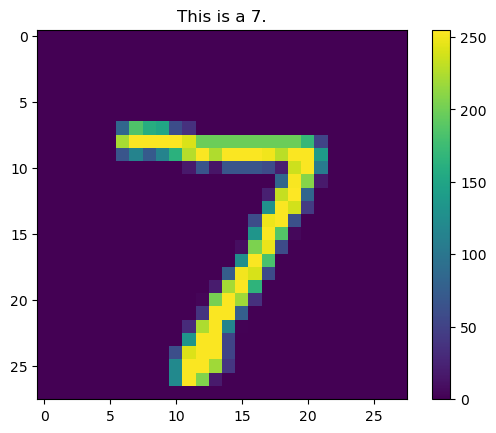

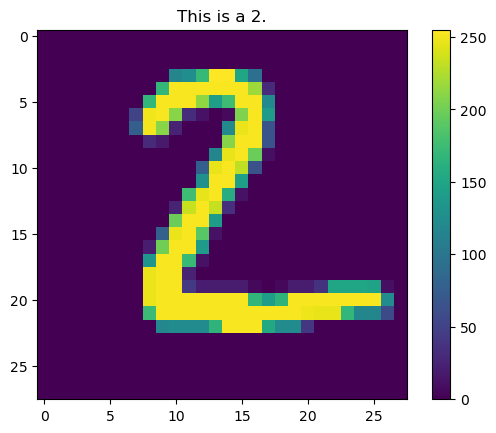

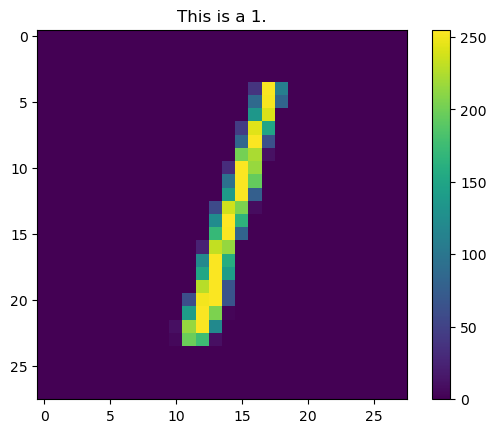

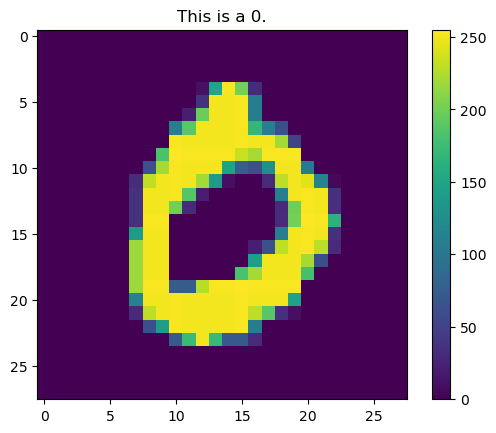

In [15]:
### to be completed

### solution
print(mnist.shape)
for i in range(4):
    plt.imshow(mnist[i])
    plt.colorbar()
    plt.title("This is a {}.".format(mnist_labels[i]))
    plt.show()

We now pre-process the dataset. We reshape and normalize the images so the values of the pixels vary between 0 and 1. The labels vary from 0 to 9 ; we map them into ±1 odd vs even labels (`%` is the remainder of the Euclidian division).

In [16]:
X = np.reshape(mnist, (len(mnist), -1))
X = (X-np.min(X))/(np.max(X)-np.min(X))
y = 1-(mnist_labels%2)*2.0
print(np.shape(X))

(10000, 784)


We need to split the dataset in three parts : the train set, the validation set and the test set. We use the train set to compute the optimal parameters (also called weights) $w$ ; the validation set for cross-validation and the test set to measure the performance of the classifier. The classifier must not depend on the test set.

The split must be a partition over the samples : each sample $(X_\mu, y_\mu)$ is assigned to one of these three sets. It must be random uniform (we do not want to have all the 0s in the train set and all the 1s in the test set). Additionally, each set must be large enough, so that the results do not depend on the particular split.

Complete the code of the split. We want 60% of samples in the train set, 20% in the validation set and 20% and the test set. We use the function `np.random.permutation` to generate a shuffled array of indices.

In [17]:
### to be completed
#indices = np.random.permutation(len(y))
#iTr = 3*len(y)//5
#iTe = 
#X_train = X[indices[:iTr]]
#y_train = y[indices[:iTr]]
#X_val =
#y_val =
#X_test =
#y_test =

### solution
indices = np.random.permutation(len(y))
iTr = 3*len(y)//5
iTe = 4*len(y)//5
X_train = X[indices[:iTr]]
y_train = y[indices[:iTr]]
X_val = X[indices[iTr:iTe]]
y_val = y[indices[iTr:iTe]]
X_test = X[indices[iTe:]]
y_test = y[indices[iTe:]]

First we try to regress $y=Xw$ without regularization on $w$. Work with the train set. Apply the formula used in the previous part. What happens ?

In [18]:
### to be completed
#w =

### solution
w = np.linalg.inv(X_train.T@X_train)@(X_train.T@y_train)

LinAlgError: Singular matrix

`Singular matrix` means the matrix is not invertible. This is a high-dimensional task in the sense that one has more parameters than enough to fit the data. You can check this by computing the rank of $X$ and comparing it to the number of parameters.

In [23]:
### to be completed

### solution
r = np.linalg.matrix_rank(X)
print(r, np.shape(X)[1])

661 784


To avoid this problem, we can constrain the problem by adding some regularization to the weights. For a regularization strength $\lambda$ the ridge regression formula gives $w=(X^TX+\lambda Id)^{-1}X^Ty$. Choose a $\lambda$ and check there is no longer an error. (Warning : in Python "lambda" is a reserved word that you should not use for a variable.)

In [24]:
### to be completed

### solution
l = 0.1
d = np.shape(X)[1]
w = np.linalg.inv(X_train.T@X_train+l*np.identity(d))@(X_train.T@y_train)

Complete the following cell to plot the train loss vs the regularization $\lambda$. We recall that the train loss is the regularized square loss (or _ridge loss_) $\frac{1}{N_\mathbb{train}}\sum_\mu^{N_\mathbb{train}}(y_\mu-\hat y_\mu)^2+\frac{\lambda}{N_\mathbb{train}}\sum_i^dw_i^2$ where $\hat y_\mu=X_\mu^Tw$ is the predicted value. At the beginning take around ten values of $\lambda$. It is better to generate them on a logarithm scale, with `np.geomspace` (similar to `np.linspace`) ; then for plotting we choose the scale with `plt.xscale`.

For classification there is another relevant quantity, the accuracy $\frac{1}{N}\sum_\mu\delta_{y_\mu, \hat y_\mu}$, where $\hat y_\mu=\mathrm{sign}(X_\mu^Tw)$ is the predicted label and $\delta_{y,\hat y}$ is 1 if $y=\hat y$ and 0 otherwise. This is the fraction of correctly classified points. We plot it vs $\lambda$ in another figure.

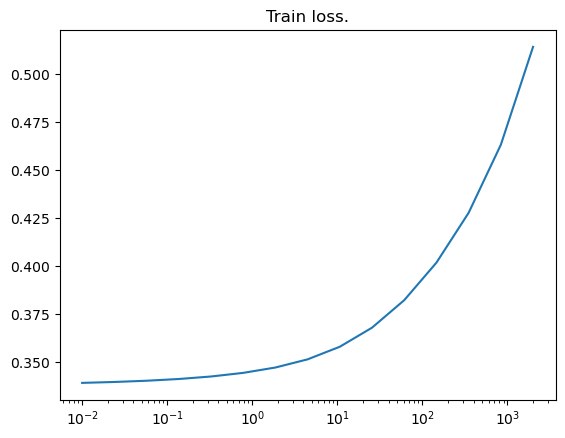

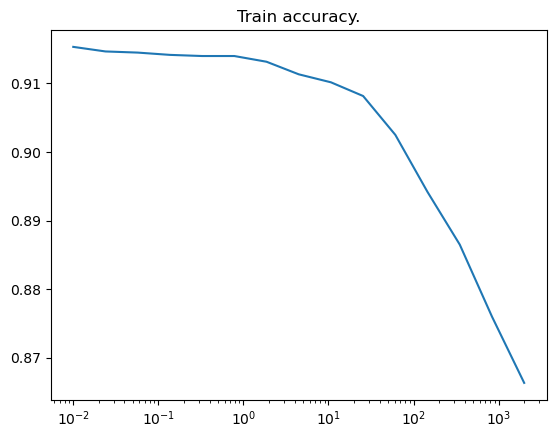

In [25]:
### to be completed
#losses = []
#accs = []
#lambdas =
#
#for l in lambdas:
#    w = 
#    y_predicted =
#    losses.append(np.mean((y_predicted-y_train)**2)+l*np.sum(w**2)/len(y_train))
#    accs.append(np.mean(np.sign(y_predicted)==y_train))
#    
#plt.plot(
#plt.title("Train loss.")
#plt.xscale('log')
#plt.show()
#plt.plot(
#plt.title("Train accuracy.")
#plt.xscale('log')
#plt.show()

### solution
d = np.shape(X)[1]
losses = []
accs = []
lambdas = np.geomspace(10**-2, 2*10**3, 15)

for l in lambdas:
    w = np.linalg.inv(X_train.T@X_train+l*np.identity(d))@(X_train.T@y_train)
    y_predicted = X_train@w
    losses.append(np.mean((y_predicted-y_train)**2)+l*np.sum(w**2)/len(y_train))
    accs.append(np.mean(np.sign(y_predicted)==y_train))
    
plt.plot(lambdas, losses)
plt.title("Train loss.")
plt.xscale('log')
plt.show()
plt.plot(lambdas, accs)
plt.title("Train accuracy.")
plt.xscale('log')
plt.show()

We observe that the more we regularize, the worse the performance on train data is. However, this does not mean that the classifier is worst at higher $\lambda$s: one has to evaluate it on the test data.

We want to find the $\lambda$ that maximizes the performance. To do this, we use cross-validation: for many values of $\lambda$, we compute the ridge classifier on the train set. Then, we compute the accuracy it achieves on the validation set, and we pick the best $\lambda$ and compute the final accuracy on the test set. We use the test set only once, since the hyperparameters ($\lambda$ in this case) must not depend on it.

Complete the following cell to compute and plot the train and validation losses and accuracies for multiple values $\lambda$.

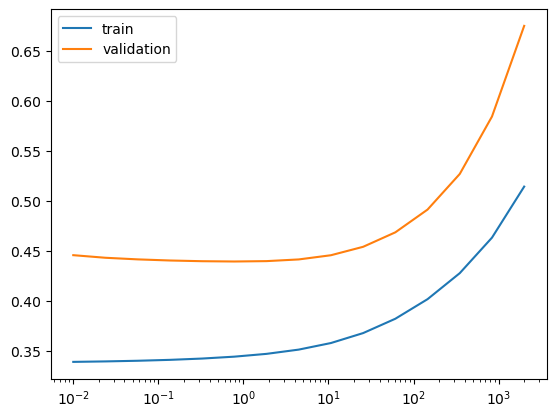

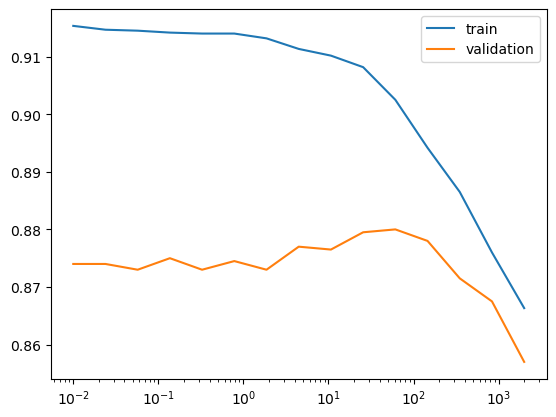

The test loss is 0.44 and the test accuracy is 89.2%.


In [26]:
### to be completed
#losses_train, losses_val = [], []
#accs_train, accs_val = [], []
#lambdas =
#
#for l in lambdas:
#    w =
#    
#    y_predicted =
#    losses_train.append(np.mean((y_predicted-y_train)**2)+l*np.sum(w**2)/len(y_train))
#    accs_train.append(np.mean(np.sign(y_predicted)==y_train))
#    
#    y_predicted =
#    losses_val.append(np.mean((y_predicted-y_val)**2)+l*np.sum(w**2)/len(y_val))
#    accs_val.append(np.mean(np.sign(y_predicted)==y_val))
#
#plt.plot( , label="train")
#plt.plot( , label="validation")
#plt.xscale('log')
#plt.legend()
#plt.show()
#
#plt.plot( , label="train")
#plt.plot( , label="validation")
#plt.xscale('log')
#plt.legend()
#plt.show()
#
#lambdaBest = 
#w = 
#y_predicted = 
#loss_test = 
#acc_test = 
#print("The test loss is {:.2} and the test accuracy is {:.1%}.".format(loss_test, acc_test))

### solution
d = np.shape(X)[1]
losses_train, losses_val = [], []
accs_train, accs_val = [], []
lambdas = np.geomspace(10**-2, 2*10**3, 15)

for l in lambdas:
    w = np.linalg.inv(X_train.T@X_train+l*np.identity(d))@(X_train.T@y_train)
    
    y_predicted = X_train@w
    losses_train.append(np.mean((y_predicted-y_train)**2)+l*np.sum(w**2)/len(y_train))
    accs_train.append(np.mean(np.sign(y_predicted)==y_train))
    
    y_predicted = X_val@w
    losses_val.append(np.mean((y_predicted-y_val)**2)+l*np.sum(w**2)/len(y_val))
    accs_val.append(np.mean(np.sign(y_predicted)==y_val))

plt.plot(lambdas, losses_train, label="train")
plt.plot(lambdas, losses_val, label="validation")
plt.xscale('log')
plt.legend()
plt.show()

plt.plot(lambdas, accs_train, label="train")
plt.plot(lambdas, accs_val, label="validation")
plt.xscale('log')
plt.legend()
plt.show()

The training accuracy decreases as you increase $\lambda$, due to not fitting the data perfectly. However, the accuracy on the validation set is non-monotone, showing a tradeoff between fitting the training set and avoid fitting it too much. We expect the validation and test accuracies to be close because $w$ depends little on the validation set.

Pick the best $\lambda$ (possibly with `np.argmax`) and compute the test loss and accuracy.

In [31]:
lambdaBest = lambdas[np.argmax(accs_val)]
w = np.linalg.inv(X_train.T@X_train+lambdaBest*np.identity(d))@(X_train.T@y_train)
y_predicted = X_test@w
loss_test = np.mean((y_predicted-y_test)**2)+lambdaBest*np.sum(w**2)/len(y_test)
acc_test = np.mean(np.sign(y_predicted)==y_test)
print("The test loss is {:.2} and the test accuracy is {:.1%}.".format(loss_test, acc_test))

The test loss is 0.44 and the test accuracy is 89.2%.


As an optional exercise, you can recompute these quantities for a different realization of the random split. These should not vary too much. $N$ is still a bit small though.

# Theoretical Exercise

## Exercise 1

You are given a dataset $(x_\mu\in \mathbb{R}, y_\mu\in\mathbb{R})$, $\mu=1,\dots, n$. You want to find the optimal parameter $w\in \mathbb{R}$ such that the mean square error
$$
\mathcal{L}(w)=\frac{1}{n}\sum_{\mu=1}^n(y_\mu-w x_\mu)^2
$$
is minimized. Give the expression of $w$ as a function of the dataset $\{x_\mu, y_\mu\}_{\mu=1}^n$. 

Hint: this is a particular case of the derivation presented in section 3.2 of the lecture notes.

Solution:

We want to minimize the loss. To do this, we search for the value of $w$ were the derivative is $0$:
$$
\frac{\partial \mathcal{L}(w)}{\partial w}=\frac{-2}{n}\sum_{\mu=1}^n(y_\mu-wx_\mu)x_\mu\stackrel{!}{=}0.
$$
This implies that
$$
\sum_{\mu=1}^n y_\mu x_\mu \stackrel{!}{=} w\sum_{\mu=1}^n x_\mu^2 \rightarrow w\stackrel{!}{=}\frac{\sum_{\mu=1}^n y_\mu x_\mu}{\sum_{\mu=1}^n x_\mu^2}
$$
By multiplying by $\frac{1/n}{1/n}=1$, we rewrite the last expression in terms of averages:
$$
w=\frac{\overline{xy}}{\overline{x^2}}
$$
where
$$
\overline{xy}=\frac{1}{n}\sum_{\mu=1}^n x_\mu y_\mu
$$
and 
$$
\overline{x^2}=\frac{1}{n}\sum_{\mu=1}^n x_\mu^2.
$$
We do not verify explicitly that this is a minimum, but it can be seen by computing the second derivative or by showing that the loss is convexe.

## Exercise 2

Why do we use a validation and a test dataset ?

Solution:

The validation dataset is required during training to fine-tune hyperparameters and choose the best
model. It ensures that the model is well-suited to the specific task without overfitting the training data. The
test dataset, separate from the training and validation data, serves to evaluate the model’s ability to generalize to
unseen, real-world data. It provides an unbiased assessment of model performance.